In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress


In [3]:
# Read data from file
df = pd.read_csv("epa-sea-level.csv")
subset_df = df.loc[df["Year"] >= 2000]

display(df)
display(subset_df)


,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
120,2000,7.062992,6.791339,7.334646,6.920582
121,2001,7.287402,7.019685,7.555118,7.087460
122,2002,7.381890,7.110236,7.653543,7.319698
123,2003,7.759843,7.484252,8.035433,7.488353
124,2004,7.740157,7.464567,8.015748,7.507933
125,2005,7.744094,7.472441,8.015748,7.644563
126,2006,7.917323,7.645669,8.188976,7.697420
127,2007,7.996063,7.712598,8.279528,7.702147
128,2008,8.350394,8.078740,8.622047,7.907365
129,2009,8.586614,8.311024,8.862205,8.046354


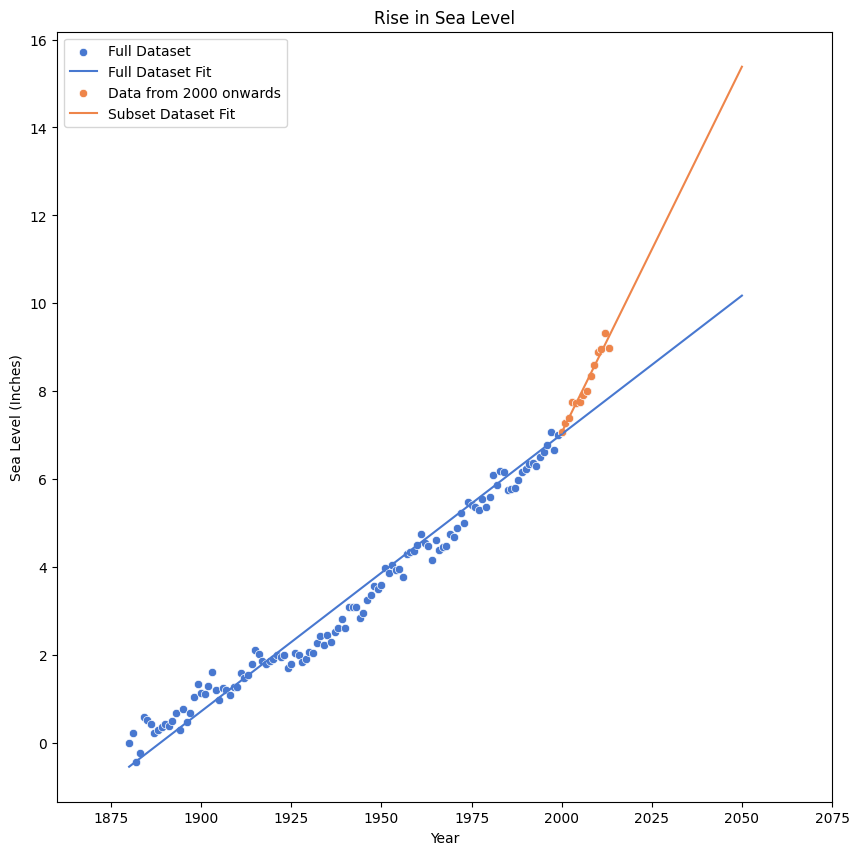

In [4]:
def draw_plot():
    # Create scatter plot and create first line of best fit to 2050
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xlim([1860, 2075])

    sns.scatterplot(data=df,
                    x="Year",
                    y="CSIRO Adjusted Sea Level",
                    color="#4878D0",
                    label="Full Dataset")
    regression = linregress(df["Year"], df["CSIRO Adjusted Sea Level"])
    years = np.arange(df["Year"].min(), 2051)
    ax.plot(years,
            regression[0] * years + regression[1],
            color="#4878D0",
            label="Full Dataset Fit")

    # Overlay recent data in a different colour
    sns.scatterplot(data=subset_df,
                    x="Year",
                    y="CSIRO Adjusted Sea Level",
                    color="#EE854A",
                    label="Data from 2000 onwards",
                    ax=ax)
    # Create second line of best fit
    subset_regression = linregress(subset_df["Year"],
                                   subset_df["CSIRO Adjusted Sea Level"])
    subset_years = np.arange(subset_df["Year"].min(), 2051)
    ax.plot(subset_years,
            subset_regression[0] * subset_years + subset_regression[1],
            color="#EE854A",
            label="Subset Dataset Fit")

    # Add labels and title
    ax.set_xlabel("Year")
    ax.set_ylabel("Sea Level (Inches)")
    ax.set_title("Rise in Sea Level")
    ax.legend()

    plt.savefig('sea_level_plot.png')


draw_plot()
